# Multi-Factor Model: Short-Term Reversal

In this notebook, you will create a short-term reversal factor. And then combine it with the momentum factor to generate a multi-factor model

The following steps are performed while creating the multi-factor model.
1. Import the libraries and data
2. Calculate the daily percentage change
3. Create a short-term reversal based factor
4. Create a multi factor portfolio

### Import the libraries and data

#### Import the libraries
You can first start by importing the libraries necessary which will be used later to get the data, store it, and create the factor based portfolio

In [1]:
# Importing modules
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import datetime as dt 

# Need to import the matplot_converters from pandas
# whenever you try to plot the columns of a dataframe using a for loop
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

#### Download the data

In [2]:
df = pd.read_csv('data/Stock_Prices_2012_To_2017_Factor.csv', index_col=[0])

# Convert the index to datetime format
df.index = pd.to_datetime(df.index, format="%Y-%m-%d")#.date

# Load the momentum factor created in the previous notebook
momentum_performance = pd.read_csv('data/Momentum_Performance_2012_To_2017.csv', index_col=[0])

# Convert the index to datatime format
momentum_performance.index = pd.to_datetime(momentum_performance.index, format='%d-%m-%Y')

### Calculate the daily percentange change

In [3]:
# Create a dataframe called df_change to hold the future returns of the stocks
df_change = df.pct_change().shift(-1)

# Drop the rows containing the null values
df_change.dropna(inplace = True)

### Create Short-Term Reversal based factor

#### How does the factor work?

The reversal factor is created using the rolling mean of the past one week's price of a stock. If a stock's price is above its past one week's average price then you sell the stock, and conversely. if it below the mean you buy it.

The assumption here is that the stocks's price would revert back to their short term mean, so you go againts the trend of the market and take a contrain position

In [9]:
# Here the value of t would be 5 as you are considering only the past one week's data
weekly_working_days = 5

# Calculate the rollowing mean of the prices and subtract it from the price
mean_reversion_factor = df - df.rolling(weekly_working_days).mean()

# Create two dataframes to hold the buy-sell signals for the rolling mean difference values of stocks
# The reversal_sell_stocks dataframe contains values of stocks that are above the rolling mean
reversal_sell_stocks = mean_reversion_factor [mean_reversion_factor > 0]

# The reversal_buy_stocks dataframe contains values of stocks that are below the rolling mean
reversal_buy_stocks = mean_reversion_factor [mean_reversion_factor < 0]

# Here you assume that the price will revert back to the rolling mean, so you sell the stock when the market goes
# above the moving average and buy the stock when the price is below the moving average


Like the momentum factor, here you sell those stocks that are in the reversal_sell_stocks and buy all those in the reversal_buy_stocks dataframe

In [15]:
# Calculate the factor performance using the returns and signals
mean_reversion_performance = (df_change *~reversal_buy_stocks.isnull() - df_change * ~reversal_sell_stocks.isnull()).mean(axis=1)

In [17]:
# Convert the mean reversion performance to a dataframe
mean_reversion_performance = pd.DataFrame(mean_reversion_performance.dropna(), columns=['return'])

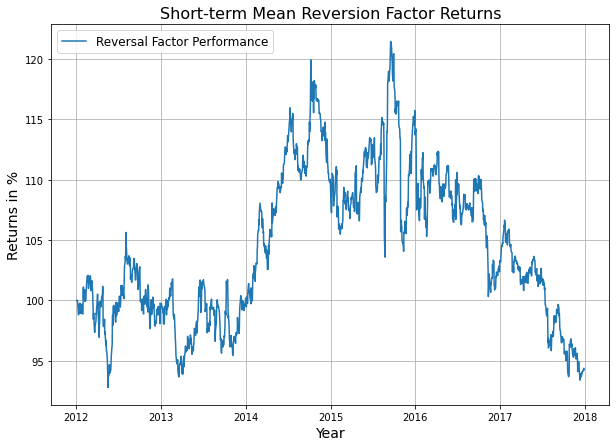

In [21]:
# Plot the performance of the factor
plt.figure(figsize=(10,7))
plt.plot((mean_reversion_performance + 1).cumprod() * 100, label='Reversal Factor Performance')
plt.legend(loc='best', fontsize=12)
plt.title('Short-term Mean Reversion Factor Returns', fontsize=16)
plt.ylabel('Returns in %', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.grid()
plt.show()